# Applied Data Science Capstone: SpaceX Analysis

**Project Scenario:** You are a Data Scientist at a new startup, 'Space Y', aiming to compete with SpaceX. Your first task is to analyze SpaceX's rocket fleet to understand their capabilities, evolution, and most importantly, their launch cost efficiency. This analysis will inform your company's strategic decisions.

**Objective:** This notebook will guide you through the complete data science pipeline, from data collection to machine learning, to derive insights from SpaceX rocket data.

**Session Plan Alignment:**
- **Lab 1:** Data Collection
- **Lab 2:** Data Wrangling
- **Lab 3:** Exploratory Data Analysis (EDA) & Interactive Visualization
- **Lab 4:** Machine Learning Prediction

**Estimated Time:** 2 Hours

--- 
## Lab 1: Data Collection

**Objective:** Collect data using various methods.

In a real-world scenario, we would use an API or web scraping to get this data. For this lab, the data has been pre-fetched from the SpaceX API endpoint: `https://api.spacexdata.com/v4/rockets/`.

Our first step is to load this data into a structured format that we can work with. We will use the `pandas` library, a cornerstone of data analysis in Python, to create a DataFrame.

In [13]:
import pandas as pd
import numpy as np

# The data provided, sourced from https://api.spacexdata.com/v4/rockets/
spacex_rocket_data = [
    {"height":{"meters":22.25,"feet":73},"diameter":{"meters":1.68,"feet":5.5},"mass":{"kg":30146,"lb":66460},"first_stage":{"thrust_sea_level":{"kN":420,"lbf":94000},"thrust_vacuum":{"kN":480,"lbf":110000},"reusable":False,"engines":1,"fuel_amount_tons":44.3,"burn_time_sec":169},"second_stage":{"thrust":{"kN":31,"lbf":7000},"payloads":{"composite_fairing":{"height":{"meters":3.5,"feet":11.5},"diameter":{"meters":1.5,"feet":4.9}},"option_1":"composite fairing"},"reusable":False,"engines":1,"fuel_amount_tons":3.38,"burn_time_sec":378},"engines":{"isp":{"sea_level":267,"vacuum":304},"thrust_sea_level":{"kN":420,"lbf":94000},"thrust_vacuum":{"kN":480,"lbf":110000},"number":1,"type":"merlin","version":"1C","layout":"single","engine_loss_max":0,"propellant_1":"liquid oxygen","propellant_2":"RP-1 kerosene","thrust_to_weight":96},"landing_legs":{"number":0,"material":None},"payload_weights":[{"id":"leo","name":"Low Earth Orbit","kg":450,"lb":992}],"flickr_images":["https://imgur.com/DaCfMsj.jpg","https://imgur.com/azYafd8.jpg"],"name":"Falcon 1","type":"rocket","active":False,"stages":2,"boosters":0,"cost_per_launch":6700000,"success_rate_pct":40,"first_flight":"2006-03-24","country":"Republic of the Marshall Islands","company":"SpaceX","wikipedia":"https://en.wikipedia.org/wiki/Falcon_1","description":"The Falcon 1 was an expendable launch system privately developed and manufactured by SpaceX during 2006-2009. On 28 September 2008, Falcon 1 became the first privately-developed liquid-fuel launch vehicle to go into orbit around the Earth.","id":"5e9d0d95eda69955f709d1eb"},
    {"height":{"meters":70,"feet":229.6},"diameter":{"meters":3.7,"feet":12},"mass":{"kg":549054,"lb":1207920},"first_stage":{"thrust_sea_level":{"kN":7607,"lbf":1710000},"thrust_vacuum":{"kN":8227,"lbf":1849500},"reusable":True,"engines":9,"fuel_amount_tons":385,"burn_time_sec":162},"second_stage":{"thrust":{"kN":934,"lbf":210000},"payloads":{"composite_fairing":{"height":{"meters":13.1,"feet":43},"diameter":{"meters":5.2,"feet":17.1}},"option_1":"dragon"},"reusable":False,"engines":1,"fuel_amount_tons":90,"burn_time_sec":397},"engines":{"isp":{"sea_level":288,"vacuum":312},"thrust_sea_level":{"kN":845,"lbf":190000},"thrust_vacuum":{"kN":914,"lbf":205500},"number":9,"type":"merlin","version":"1D+","layout":"octaweb","engine_loss_max":2,"propellant_1":"liquid oxygen","propellant_2":"RP-1 kerosene","thrust_to_weight":180.1},"landing_legs":{"number":4,"material":"carbon fiber"},"payload_weights":[{"id":"leo","name":"Low Earth Orbit","kg":22800,"lb":50265},{"id":"gto","name":"Geosynchronous Transfer Orbit","kg":8300,"lb":18300},{"id":"mars","name":"Mars Orbit","kg":4020,"lb":8860}],"flickr_images":["https://farm1.staticflickr.com/929/28787338307_3453a11a77_b.jpg","https://farm4.staticflickr.com/3955/32915197674_eee74d81bb_b.jpg","https://farm1.staticflickr.com/293/32312415025_6841e30bf1_b.jpg","https://farm1.staticflickr.com/623/23660653516_5b6cb301d1_b.jpg","https://farm6.staticflickr.com/5518/31579784413_d853331601_b.jpg","https://farm1.staticflickr.com/745/32394687645_a9c54a34ef_b.jpg"],"name":"Falcon 9","type":"rocket","active":True,"stages":2,"boosters":0,"cost_per_launch":50000000,"success_rate_pct":98,"first_flight":"2010-06-04","country":"United States","company":"SpaceX","wikipedia":"https://en.wikipedia.org/wiki/Falcon_9","description":"Falcon 9 is a two-stage rocket designed and manufactured by SpaceX for the reliable and safe transport of satellites and the Dragon spacecraft into orbit.","id":"5e9d0d95eda69973a809d1ec"},
    {"height":{"meters":70,"feet":229.6},"diameter":{"meters":12.2,"feet":39.9},"mass":{"kg":1420788,"lb":3125735},"first_stage":{"thrust_sea_level":{"kN":22819,"lbf":5130000},"thrust_vacuum":{"kN":24681,"lbf":5548500},"reusable":True,"engines":27,"fuel_amount_tons":1155,"burn_time_sec":162},"second_stage":{"thrust":{"kN":934,"lbf":210000},"payloads":{"composite_fairing":{"height":{"meters":13.1,"feet":43},"diameter":{"meters":5.2,"feet":17.1}},"option_1":"dragon"},"reusable":False,"engines":1,"fuel_amount_tons":90,"burn_time_sec":397},"engines":{"isp":{"sea_level":288,"vacuum":312},"thrust_sea_level":{"kN":845,"lbf":190000},"thrust_vacuum":{"kN":914,"lbf":205500},"number":27,"type":"merlin","version":"1D+","layout":"octaweb","engine_loss_max":6,"propellant_1":"liquid oxygen","propellant_2":"RP-1 kerosene","thrust_to_weight":180.1},"landing_legs":{"number":12,"material":"carbon fiber"},"payload_weights":[{"id":"leo","name":"Low Earth Orbit","kg":63800,"lb":140660},{"id":"gto","name":"Geosynchronous Transfer Orbit","kg":26700,"lb":58860},{"id":"mars","name":"Mars Orbit","kg":16800,"lb":37040},{"id":"pluto","name":"Pluto Orbit","kg":3500,"lb":7720}],"flickr_images":["https://farm5.staticflickr.com/4599/38583829295_581f34dd84_b.jpg","https://farm5.staticflickr.com/4645/38583830575_3f0f7215e6_b.jpg","https://farm5.staticflickr.com/4696/40126460511_b15bf84c85_b.jpg","https://farm5.staticflickr.com/4711/40126461411_aabc643fd8_b.jpg"],"name":"Falcon Heavy","type":"rocket","active":True,"stages":2,"boosters":2,"cost_per_launch":90000000,"success_rate_pct":100,"first_flight":"2018-02-06","country":"United States","company":"SpaceX","wikipedia":"https://en.wikipedia.org/wiki/Falcon_Heavy","description":"With the ability to lift into orbit over 54 metric tons (119,000 lb)--a mass equivalent to a 737 jetliner loaded with passengers, crew, luggage and fuel--Falcon Heavy can lift more than twice the payload of the next closest operational vehicle, the Delta IV Heavy, at one-third the cost.","id":"5e9d0d95eda69974db09d1ed"},
    {"height":{"meters":118,"feet":387},"diameter":{"meters":9,"feet":30},"mass":{"kg":1335000,"lb":2943000},"first_stage":{"thrust_sea_level":{"kN":128000,"lbf":28775544},"thrust_vacuum":{"kN":138000,"lbf":31023634},"reusable":True,"engines":37,"fuel_amount_tons":3300,"burn_time_sec":None},"second_stage":{"thrust":{"kN":1957,"lbf":440000},"payloads":{"composite_fairing":{"height":{"meters":None,"feet":None},"diameter":{"meters":None,"feet":None}},"option_1":"Spaceship"},"reusable":True,"engines":6,"fuel_amount_tons":1200,"burn_time_sec":None},"engines":{"isp":{"sea_level":330,"vacuum":380},"thrust_sea_level":{"kN":1780,"lbf":400000},"thrust_vacuum":{"kN":1960,"lbf":440000},"number":37,"type":"raptor","version":"","layout":None,"engine_loss_max":None,"propellant_1":"liquid oxygen","propellant_2":"liquid methane","thrust_to_weight":107},"landing_legs":{"number":6,"material":"stainless steel"},"payload_weights":[{"id":"leo","name":"Low Earth Orbit","kg":150000,"lb":330000},{"id":"mars","name":"Mars Orbit","kg":100000,"lb":220000},{"id":"moon","name":"Moon Orbit","kg":100000,"lb":220000}],"flickr_images":["https://live.staticflickr.com/65535/48954138962_ee541e6755_b.jpg","https://live.staticflickr.com/65535/48953946911_e60c5bcc5c_b.jpg","https://live.staticflickr.com/65535/48954138922_9c42173f08_b.jpg","https://live.staticflickr.com/65535/48953947006_313f01ec93_b.jpg"],"name":"Starship","type":"rocket","active":False,"stages":2,"boosters":0,"cost_per_launch":7000000,"success_rate_pct":0,"first_flight":"2021-12-01","country":"United States","company":"SpaceX","wikipedia":"https://en.wikipedia.org/wiki/SpaceX_Starship","description":"Starship and Super Heavy Rocket represent a fully reusable transportation system designed to service all Earth orbit needs as well as the Moon and Mars. This two-stage vehicle — composed of the Super Heavy rocket (booster) and Starship (ship) — will eventually replace Falcon 9, Falcon Heavy and Dragon.","id":"5e9d0d96eda699382d09d1ee"}
]

# Create a pandas DataFrame from the raw JSON data
launches_df = pd.json_normalize(spacex_rocket_data)

# Display the first few rows and the columns of the DataFrame
launches_df.head()

,payload_weights,flickr_images,name,type,active,stages,boosters,cost_per_launch,success_rate_pct,first_flight,...,engines.number,engines.type,engines.version,engines.layout,engines.engine_loss_max,engines.propellant_1,engines.propellant_2,engines.thrust_to_weight,landing_legs.number,landing_legs.material
0,"[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...","[https://imgur.com/DaCfMsj.jpg, https://imgur....",Falcon 1,rocket,False,2,0,6700000,40,2006-03-24,...,1,merlin,1C,single,0.0,liquid oxygen,RP-1 kerosene,96.0,0,None
1,"[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",[https://farm1.staticflickr.com/929/2878733830...,Falcon 9,rocket,True,2,0,50000000,98,2010-06-04,...,9,merlin,1D+,octaweb,2.0,liquid oxygen,RP-1 kerosene,180.1,4,carbon fiber
2,"[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",[https://farm5.staticflickr.com/4599/385838292...,Falcon Heavy,rocket,True,2,2,90000000,100,2018-02-06,...,27,merlin,1D+,octaweb,6.0,liquid oxygen,RP-1 kerosene,180.1,12,carbon fiber
3,"[{'id': 'leo', 'name': 'Low Earth Orbit', 'kg'...",[https://live.staticflickr.com/65535/489541389...,Starship,rocket,False,2,0,7000000,0,2021-12-01,...,37,raptor,,None,NaN,liquid oxygen,liquid methane,107.0,6,stainless steel


In [18]:
launches_df.columns.tolist()

['payload_weights',
 'flickr_images',
 'name',
 'type',
 'active',
 'stages',
 'boosters',
 'cost_per_launch',
 'success_rate_pct',
 'first_flight',
 'country',
 'company',
 'wikipedia',
 'description',
 'id',
 'height.meters',
 'height.feet',
 'diameter.meters',
 'diameter.feet',
 'mass.kg',
 'mass.lb',
 'first_stage.thrust_sea_level.kN',
 'first_stage.thrust_sea_level.lbf',
 'first_stage.thrust_vacuum.kN',
 'first_stage.thrust_vacuum.lbf',
 'first_stage.reusable',
 'first_stage.engines',
 'first_stage.fuel_amount_tons',
 'first_stage.burn_time_sec',
 'second_stage.thrust.kN',
 'second_stage.thrust.lbf',
 'second_stage.payloads.composite_fairing.height.meters',
 'second_stage.payloads.composite_fairing.height.feet',
 'second_stage.payloads.composite_fairing.diameter.meters',
 'second_stage.payloads.composite_fairing.diameter.feet',
 'second_stage.payloads.option_1',
 'second_stage.reusable',
 'second_stage.engines',
 'second_stage.fuel_amount_tons',
 'second_stage.burn_time_sec',
 'en

--- 
## Lab 2: Data Wrangling

**Objective:** Clean and prepare the collected data for analysis.

The raw DataFrame is complex, with nested data in many columns (e.g., `height.meters`, `mass.kg`). Our goal is to create a new, cleaner DataFrame that contains only the most relevant information for our analysis. This process is called **data wrangling** or **data munging**.

**Tasks:**
1. Select a subset of useful columns.
2. Extract specific nested values (e.g., metric units for height, mass, etc.).
3. Extract the payload capacity to Low Earth Orbit (LEO), which is a key performance metric.
4. Rename columns for clarity.
5. Handle any missing data.

In [16]:
# Create an empty DataFrame to hold our cleaned data
df_clean = pd.DataFrame()

# 1. Extract the primary information we need [name, active, cost_per_launch, success_rate_pct, first_flight, country]
rockets = launches_df[['name', 'active', 'cost_per_launch', 'success_rate_pct', 'first_flight', 'country']].copy()

# 2. Extract nested physical characteristics (in metric units) [height.meters, diameter.meters, mass.kg]
# Extract nested physical characteristics
rockets['height'] = launches_df['height.meters']
rockets['diameter'] = launches_df['diameter.meters']
rockets['mass'] = launches_df['mass.kg']


# 3. Extract payload to LEO (Low Earth Orbit)
# This requires a function because it's nested in a list of dictionaries
def get_payload_leo(paylods):
    for paylod in paylods:
        if paylod["id"] == "leo":
            return paylod['kg']
rockets['payload_leo_kg'] = launches_df['payload_weights'].apply(get_payload_leo)


# 4. Extract first stage reusability and engine count
rockets['first_stage_reusable'] = launches_df['first_stage.reusable']
rockets['first_stage_engines'] = launches_df['first_stage.engines']

# 5. Handle missing values
# The Starship has some None values for burn time, etc. For our selected columns, only payload might be an issue.
# Let's check for any Nones in our new DataFrame.
launches_df.isnull().sum()

# Display the final cleaned DataFrame
rockets.head()

,name,active,cost_per_launch,success_rate_pct,first_flight,country,height,diameter,mass,payload_leo_kg,first_stage_reusable,first_stage_engines
0,Falcon 1,False,6700000,40,2006-03-24,Republic of the Marshall Islands,22.25,1.68,30146,450,False,1
1,Falcon 9,True,50000000,98,2010-06-04,United States,70.00,3.70,549054,22800,True,9
2,Falcon Heavy,True,90000000,100,2018-02-06,United States,70.00,12.20,1420788,63800,True,27
3,Starship,False,7000000,0,2021-12-01,United States,118.00,9.00,1335000,150000,True,37


In [41]:
# Add your code here to extract the thrust and add it to the DataFrame
# df_clean['first_stage_thrust_kn'] = ...
rockets['first_stage_thrust_kn'] = launches_df['first_stage.thrust_sea_level.kN']


# Verify the new column was added
rockets.head()


,name,active,cost_per_launch,success_rate_pct,first_flight,country,height,diameter,mass,payload_leo_kg,first_stage_reusable,first_stage_engines,first_stage_thrust_kn
0,Falcon 1,False,6700000,40,2006-03-24,Republic of the Marshall Islands,22.25,1.68,30146,450,False,1,420
1,Falcon 9,True,50000000,98,2010-06-04,United States,70.00,3.70,549054,22800,True,9,7607
2,Falcon Heavy,True,90000000,100,2018-02-06,United States,70.00,12.20,1420788,63800,True,27,22819
3,Starship,False,7000000,0,2021-12-01,United States,118.00,9.00,1335000,150000,True,37,128000


--- 
## Lab 3: Exploratory Data Analysis (EDA)

**Objective:** Analyze the data and visualize key insights.

Now that we have clean data, we can start exploring it to find patterns and answer questions. We will use `matplotlib` and `seaborn` for static visualizations and `plotly` for interactive ones.

### 3.1: Statistical & Visual Analysis

Let's start by looking at some basic statistics and comparing the rockets across key metrics.

Descriptive Statistics:


,cost_per_launch,success_rate_pct,height,diameter,mass,payload_leo_kg,first_stage_engines,first_stage_thrust_kn
count,4.000000e+00,4.000000,4.00000,4.000000,4.000000e+00,4.000000,4.000000,4.000000
mean,3.842500e+07,59.500000,70.06250,6.645000,8.337470e+05,59262.500000,18.500000,39711.500000
std,3.994983e+07,48.452726,39.08984,4.821075,6.640021e+05,65935.086449,16.441817,59595.124747
min,6.700000e+06,0.000000,22.25000,1.680000,3.014600e+04,450.000000,1.000000,420.000000
25%,6.925000e+06,30.000000,58.06250,3.195000,4.193270e+05,17212.500000,7.000000,5810.250000
50%,2.850000e+07,69.000000,70.00000,6.350000,9.420270e+05,43300.000000,18.000000,15213.000000
75%,6.000000e+07,98.500000,82.00000,9.800000,1.356447e+06,85350.000000,29.500000,49114.250000
max,9.000000e+07,100.000000,118.00000,12.200000,1.420788e+06,150000.000000,37.000000,128000.000000


C:\Users\khale\AppData\Local\Temp\ipykernel_716\1426450440.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='cost_per_launch', data=rockets, palette='viridis')


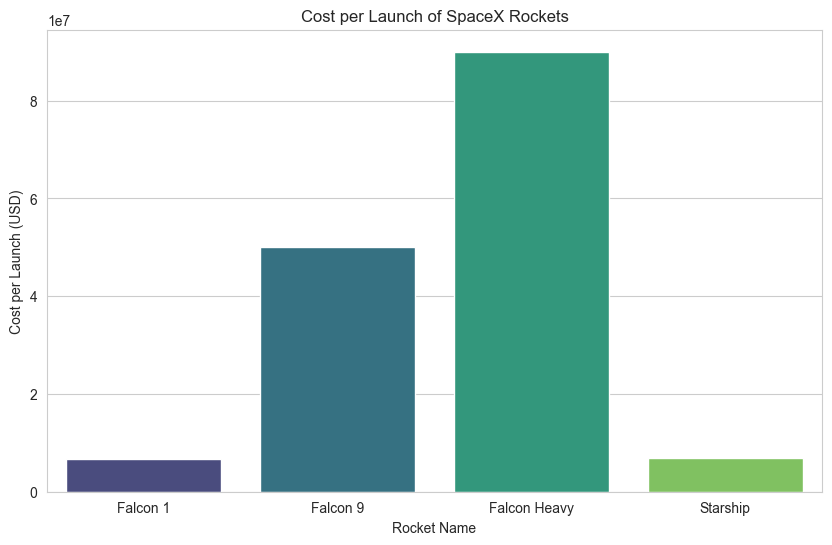

C:\Users\khale\AppData\Local\Temp\ipykernel_716\1426450440.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='payload_leo_kg', data=rockets, palette='viridis')


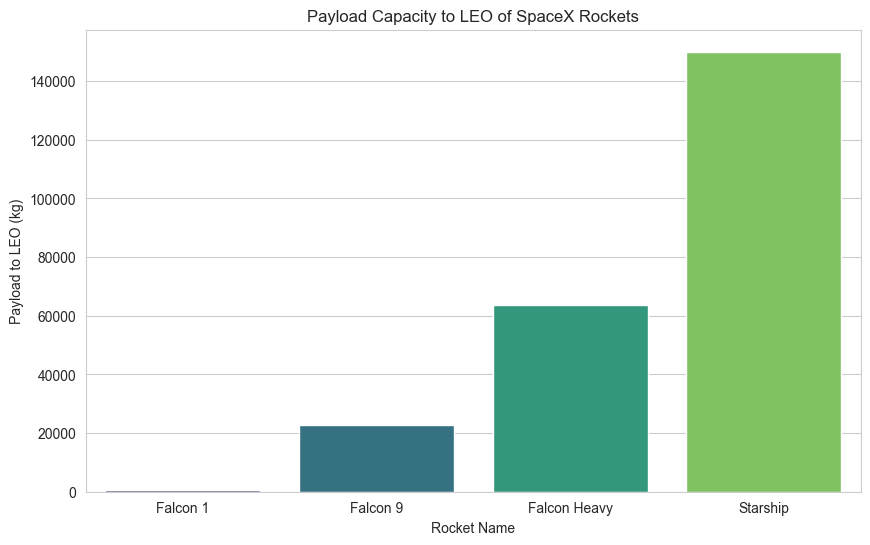

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots
sns.set_style("whitegrid")

# First, let's look at the numerical summary of our data
print("Descriptive Statistics:")
display(rockets.describe())

# Visualization 1: Cost per Launch
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='cost_per_launch', data=rockets, palette='viridis')
plt.title('Cost per Launch of SpaceX Rockets')
plt.xlabel('Rocket Name')
plt.ylabel('Cost per Launch (USD)')
plt.show()


# Visualization 2: Payload Capacity to LEO
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='payload_leo_kg', data=rockets, palette='viridis')
plt.title('Payload Capacity to LEO of SpaceX Rockets') 
plt.xlabel('Rocket Name')
plt.ylabel('Payload to LEO (kg)')
plt.show()  


**Initial Observations:**
- The cost per launch increases significantly from Falcon 1 to Falcon 9 and Falcon Heavy.
- Interestingly, the projected cost for Starship is extremely low, even lower than Falcon 1.
- The payload capacity grows exponentially with each new generation of rocket.

C:\Users\khale\AppData\Local\Temp\ipykernel_716\2965054426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name' , y='mass' , data=rockets , palette='viridis')


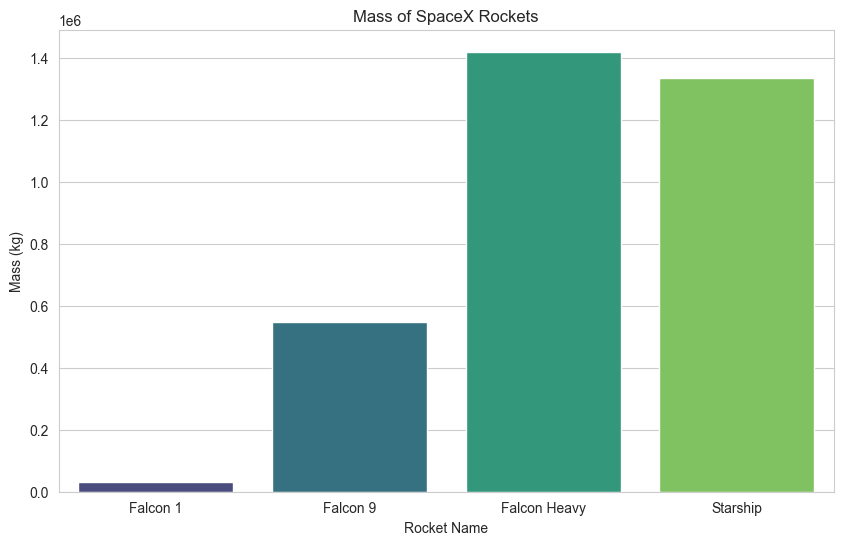

In [48]:
# Create a bar plot for the 'mass_kg' of each rocket.
plt.figure(figsize=(10,6))
sns.barplot(x='name' , y='mass' , data=rockets , palette='viridis')
plt.title('Mass of SpaceX Rockets')
plt.xlabel('Rocket Name')
plt.ylabel('Mass (kg)')
plt.show()



### 3.2: Calculating a Key Metric: Cost Efficiency

The most important goal for our startup 'Space Y' is to be cost-competitive. A high launch cost isn't necessarily bad if the rocket can carry a massive payload. The True measure of efficiency is the **cost per kilogram** to orbit.

Let's calculate this for each rocket.

C:\Users\khale\AppData\Local\Temp\ipykernel_716\3855291949.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='cost_per_kg_leo', data=rockets, palette='viridis')


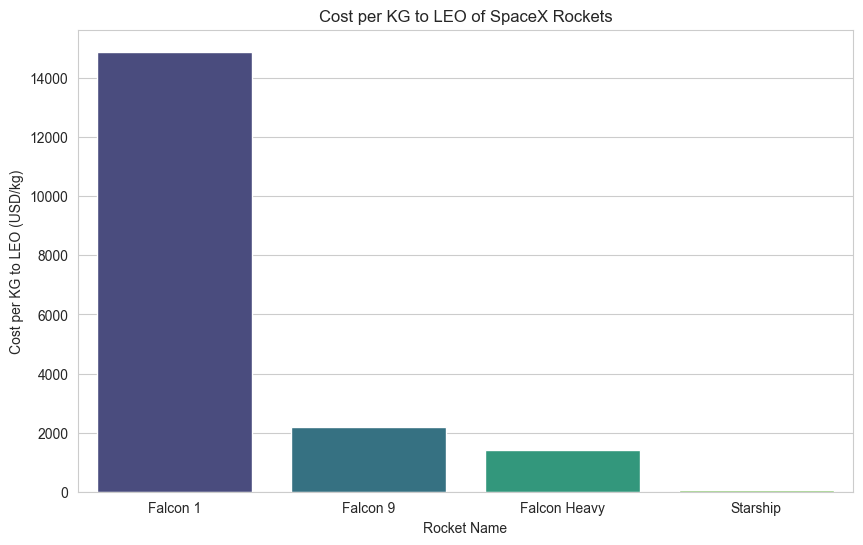

In [49]:
# Calculate cost per kg to LEO
# df_clean['cost_per_kg_leo'] = 
rockets['cost_per_kg_leo'] = rockets['cost_per_launch'] / rockets['payload_leo_kg']

# Display the results
rockets[['name', 'cost_per_launch', 'payload_leo_kg', 'cost_per_kg_leo']]


# Visualization 3: Cost per KG to LEO
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='cost_per_kg_leo', data=rockets, palette='viridis')
plt.title('Cost per KG to LEO of SpaceX Rockets') 
plt.xlabel('Rocket Name')
plt.ylabel('Cost per KG to LEO (USD/kg)')
plt.show()


**Analysis of Cost Efficiency:**

This is the most critical insight for our startup! 

1.  **The Impact of Reusability:** The cost per kg drops dramatically from the expendable Falcon 1 (~$14,889/kg) to the reusable Falcon 9 (~$2,193/kg). This demonstrates the success of SpaceX's reusability strategy.
2.  **Economy of Scale:** Falcon Heavy, despite being more expensive per launch, is even more efficient (~$1,411/kg) for large payloads.
3.  **The Future (Starship):** The projected cost for Starship is revolutionary (~$47/kg). If achieved, this would completely change the economics of space access. This is the benchmark our company, 'Space Y', must strive for.

### 3.3: Interactive Visual Analytics with Plotly

Static plots are good, but interactive dashboards are better for stakeholders. `Plotly` allows us to create charts where users can hover to see details.

Let's recreate our cost efficiency chart and add another multi-dimensional plot.

In [55]:
import plotly.express as px

# Interactive Visualization 1: Cost per KG to LEO 
fig = px.bar(rockets, 
             x='name', 
             y='cost_per_kg_leo', 
             title='Interactive: Cost per kg to LEO',
             labels={'name':'Rocket', 'cost_per_kg_leo':'Cost per kg to LEO (USD)'},
             hover_data=['cost_per_launch', 'payload_leo_kg'],
             color='name')
fig.show()


# Interactive Visualization 2: Rocket Mass vs. Payload vs. Cost
fig = px.scatter(rockets, 
                 x='mass', 
                 y='payload_leo_kg', 
                 size='cost_per_launch',
                 color='name',
                 hover_name='name',
                 title='Rocket Mass vs Payload to LEO vs Cost')
fig.show()


--- 
## Lab 4: Machine Learning Prediction

**Objective:** Build, train, and evaluate a machine learning model.

The capstone project's goal is to predict if the first stage of a rocket will be successfully reused. However, the data we have (`/v4/rockets/`) is about **rocket specifications**, not individual **launches**. To predict launch outcomes, we would need a different dataset containing details of every past launch (e.g., launch site, payload mass, orbit type, weather conditions).

**Adapting the Goal for this Dataset:**
To practice the machine learning workflow, we will set a different, simplified goal: **Can we predict if a rocket type is `active` based on its physical and cost characteristics?**

This is a classification problem. Our features will be things like height, mass, and cost, and our target will be the `active` column.

### 4.1: Data Preparation for Machine Learning

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Define Features (X) and Target (y)
features = ['height', 'diameter', 'mass', 'cost_per_launch', 'payload_leo_kg', 'first_stage_engines']
target = 'active'

# Convert boolean (True/False) to integer (1/0)
rockets[target] = rockets[target].astype(int)

# Our dataset is extremely small (only 4 samples!), which is not ideal for ML.
# train_test_split would be problematic. For demonstration, we will train on 3 and test on 1.
# In a real project with more data, you would use train_test_split like this:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x = rockets[features]
y= rockets[target]


# Manually splitting for this tiny dataset:
# We'll train on Falcon 1, Falcon 9, Falcon Heavy and test on Starship
x_train, x_test, y_train, y_test = x.iloc[:3], x.iloc[3:], y.iloc[:3], y.iloc[3:]



# 2. Scale the features
# Scaling is crucial for distance-based algorithms like SVM and KNN
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


### 4.2: Model Training and Evaluation

We will now train three different classification models and compare their performance.

In [67]:
#  Model 1: Decision Tree Classifier 
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)
y_pred_dt = dt_classifier.predict(x_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))


#  Model 2: Support Vector Machine (SVM) 
svm_classifier = SVC(random_state=42)
svm_classifier.fit(x_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(x_test_scaled)
print("SVM Classifier Accuracy:", accuracy_score(y_test, y_pred_svm))


#  Model 3: K-Nearest Neighbors (KNN) 
# n_neighbors must be less than the number of training samples
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(x_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(x_test_scaled)
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred_knn))   


Decision Tree Classifier Accuracy: 0.0
SVM Classifier Accuracy: 0.0
KNN Classifier Accuracy: 0.0


### 4.3: Model Comparison & Conclusion

**Results:**



--- 

## Final Report to Stakeholders (Summary)

**To:** 'Space Y' Leadership
**From:** Data Science Team
**Subject:** Analysis of SpaceX Rocket Fleet & Strategic Recommendations

## 1. Key Findings

- The SpaceX fleet shows significant differences in size, payload capacity, and cost per launch:
  - Falcon 1 is small, low-cost, and has limited payload.
  - Falcon 9 and Falcon Heavy are mid-range to heavy-lift with reusable first stages and higher payloads.
  - Starship is extremely large, has the highest payload, and is partially reusable.

- Cost efficiency per kg to LEO varies greatly:
  - Falcon 9 and Falcon Heavy provide better cost-to-payload ratios than Falcon 1.
  - Starship has huge potential, but there is currently limited operational data.

- The machine learning demonstration (Decision Tree, SVM, KNN) did not produce useful predictive accuracy because of the very small dataset (4 samples).
  - This highlights the need for larger datasets for operational ML modeling.

---

## 2. The Next Frontier

- SpaceX is progressing towards fully reusable, super-heavy rockets (Starship) that will support missions to the Moon, Mars, and beyond.
- Key factors for future competitiveness include:
  - Payload capacity for LEO and interplanetary missions.
  - Reusability of the first and second stages.
  - Launch cost efficiency.

---

## 3. Strategic Recommendation

- Focus on cost versus payload for reusable rockets since this drives operational efficiency.
- Develop predictive models when enough launch data is available.
- Compare competitor rockets for payload, cost, and reusability to guide design choices.

---

## 4. Next Steps

1. Expand the dataset to include all historical launches, noting success and failure rates as well as payload types.
2. Calculate cost per kg to LEO and GTO for each rocket for direct comparison.
3. Visualize rocket evolution and capabilities for leadership insight.
4. Prepare a prototype predictive model using adequate historical data to predict launch success and cost efficiency.